In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [22]:
n = np.array([[1,1,1]]) / np.sqrt(3)
3*(np.eye(3) - 2*np.matmul(n.T, n))

array([[ 1., -2., -2.],
       [-2.,  1., -2.],
       [-2., -2.,  1.]])

In [94]:
S = np.array([
    [.5, 0, 0, 0],
    [ 0,.5, 0, 0],
    [ 0, 0,.5, 0],
    [ 0, 0, 0, 1]
])
P = np.array([
    [ 2, -1, -1, 0],
    [-1,  2, -1, 0],
    [-1, -1,  2, 0],
    [ 0,  0,  0, 3]
]) / 3
M = np.array([
    [ 1, -2, -2, 0],
    [-2,  1, -2, 0],
    [-2, -2,  1, 0],
    [ 0,  0,  0, 3]
]) / 3

V = np.array([
    [0,0,0,1],
    [0,0,1,1],
    [0,1,1,1],
    [0,1,0,1],
    [1,0,0,1],
    [1,0,1,1],
    [1,1,1,1],
    [1,1,0,1],
])
A = np.array([
    [0,0,0,1],
    [0,0,1,1],
    [0,1,1,1],
    [0,1,0,1],
    [0,0,0,1],
    [1,0,0,1],
    [1,0,1,1],
    [1,1,1,1],
    [1,1,0,1],
    [1,0,0,1],
])
B = np.array([
    [0,0,1,1],
    [1,0,1,1],
])
C = np.array([
    [0,1,1,1],
    [1,1,1,1],
])
D = np.array([
    [0,1,0,1],
    [1,1,0,1],
])

In [98]:
sV = np.matmul(V, S)
sA = np.matmul(A, S)
sB = np.matmul(B, S)
sC = np.matmul(C, S)
sD = np.matmul(D, S)

pV = np.matmul(V, P)
pA = np.matmul(A, P)
pB = np.matmul(B, P)
pC = np.matmul(C, P)
pD = np.matmul(D, P)

mV = np.matmul(V, M)
mA = np.matmul(A, M)
mB = np.matmul(B, M)
mC = np.matmul(C, M)
mD = np.matmul(D, M)

In [112]:
np.meshgrid([0,1,2,3,4], [0,1,2,3,4])

[array([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]),
 array([[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]])]

<IPython.core.display.Javascript object>


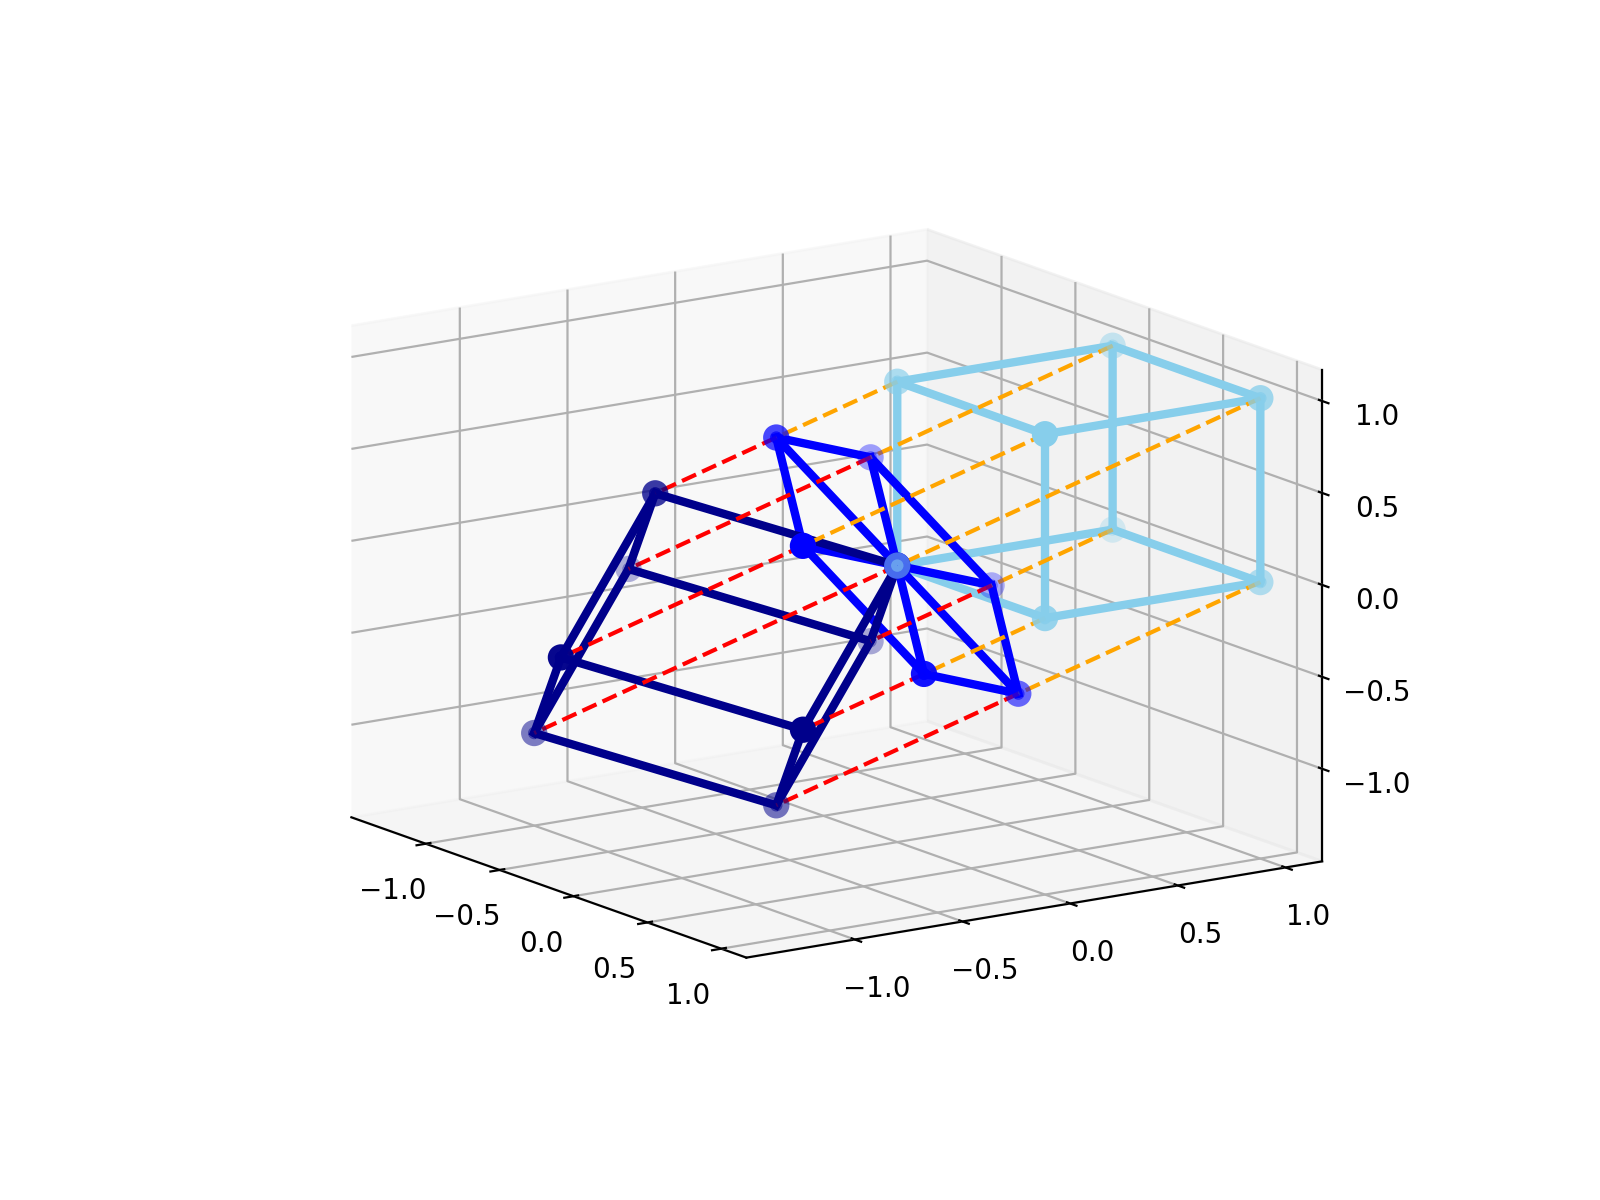

In [121]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d', proj_type = 'ortho')

ax.scatter(*V[:,:3].T, color='skyblue', linewidth=5)
ax.plot(*A[:,:3].T, color='skyblue', linewidth=3)
ax.plot(*B[:,:3].T, color='skyblue', linewidth=3)
ax.plot(*C[:,:3].T, color='skyblue', linewidth=3)
ax.plot(*D[:,:3].T, color='skyblue', linewidth=3)

ax.scatter(*pV[:,:3].T, color='b', linewidth=5)
ax.plot(*pA[:,:3].T, color='b', linewidth=3)
ax.plot(*pB[:,:3].T, color='b', linewidth=3)
ax.plot(*pC[:,:3].T, color='b', linewidth=3)
ax.plot(*pD[:,:3].T, color='b', linewidth=3)

ax.scatter(*mV[:,:3].T, color='darkblue', linewidth=5)
ax.plot(*mA[:,:3].T, color='darkblue', linewidth=3)
ax.plot(*mB[:,:3].T, color='darkblue', linewidth=3)
ax.plot(*mC[:,:3].T, color='darkblue', linewidth=3)
ax.plot(*mD[:,:3].T, color='darkblue', linewidth=3)

# ax.scatter(*sV[:,:3].T, color='green', linewidth=4)
# ax.plot(*sA[:,:3].T, color='green', linewidth=3)
# ax.plot(*sB[:,:3].T, color='green', linewidth=3)
# ax.plot(*sC[:,:3].T, color='green', linewidth=3)
# ax.plot(*sD[:,:3].T, color='green', linewidth=3)

for vecs in zip(V, pV):
    ax.plot(*np.array(vecs)[:,:3].T, linestyle='--', color='orange')
for vecs in zip(pV, mV):
    ax.plot(*np.array(vecs)[:,:3].T, linestyle='--', color='red')

In [79]:
help(ax.scatter)

Help on method scatter in module mpl_toolkits.mplot3d.axes3d:

scatter(xs, ys, zs=0, zdir='z', s=20, c=None, depthshade=True, *args, **kwargs) method of matplotlib.axes._subplots.Axes3DSubplot instance
    Create a scatter plot.
    
    Parameters
    ----------
    xs, ys : array-like
         The data positions.
    zs : float or array-like, optional, default: 0
        The z-positions. Either an array of the same length as *xs* and
        *ys* or a single value to place all points in the same plane.
    zdir : {'x', 'y', 'z', '-x', '-y', '-z'}, optional, default: 'z'
        The axis direction for the *zs*. This is useful when plotting 2D
        data on a 3D Axes. The data must be passed as *xs*, *ys*. Setting
        *zdir* to 'y' then plots the data to the x-z-plane.
    
        See also :doc:`/gallery/mplot3d/2dcollections3d`.
    
    s : scalar or array-like, optional, default: 20
        The marker size in points**2. Either an array of the same length
        as *xs* and *